In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
data=pd.read_csv('covid_19.csv',encoding='latin1')
data.head()

,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
0,0,2020-01-22,Afghanistan,0,0,0.0,0.0,0,0,0
1,1,2020-01-22,Albania,0,0,0.0,0.0,0,0,0
2,2,2020-01-22,Algeria,0,0,0.0,0.0,0,0,0
3,3,2020-01-22,Andorra,0,0,0.0,0.0,0,0,0
4,4,2020-01-22,Angola,0,0,0.0,0.0,0,0,0


In [16]:
data['Date']=pd.to_datetime(data['Date'])
data['YearMonth']=data['Date'].map(lambda date: 100*date.year+date.month)


# month_april = data.query("YearMonth == 202004").reset_index()
month_april=data.loc[data['YearMonth']==202004]
tx_Patients=data.groupby(['Country/Region'])['Confirmed'].sum().reset_index()

tx_Patients_sort = tx_Patients.sort_values(['Confirmed'],ascending=False).reset_index()
tx_Patients_sort.head(8)


,index,Country/Region,Confirmed
0,179,US,8389116878
1,78,India,5323741972
2,23,Brazil,3933028307
3,142,Russia,1315019856
4,61,France,1262530357
5,183,United Kingdom,1132824737
6,178,Turkey,996153438
7,84,Italy,931689096


In [17]:
tx_iran = data.loc[(data['Country/Region']=='Iran')]
tx_iran

,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,YearMonth
80,80,2020-01-22,Iran,0,0,0.0,0.0,0,0,0,202001
273,273,2020-01-23,Iran,0,0,0.0,0.0,0,0,0,202001
466,466,2020-01-24,Iran,0,0,0.0,0.0,0,0,0,202001
659,659,2020-01-25,Iran,0,0,0.0,0.0,0,0,0,202001
852,852,2020-01-26,Iran,0,0,0.0,0.0,0,0,0,202001
...,...,...,...,...,...,...,...,...,...,...,...
107774,107774,2021-08-02,Iran,3940708,91407,3404533.0,444768.0,37189,411,19338,202108
107967,107967,2021-08-03,Iran,3979727,91785,3424650.0,463292.0,39019,378,20117,202108
108160,108160,2021-08-04,Iran,4019084,92194,3444798.0,482092.0,39357,409,20148,202108
108353,108353,2021-08-05,Iran,4057758,92628,0.0,3965130.0,38674,434,-3444798,202108


<AxesSubplot:xlabel='days'>

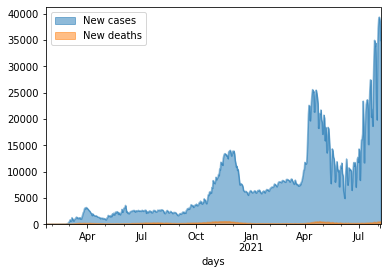

In [18]:
tx_iran_date=pd.DataFrame({'days':tx_iran['Date'],'New cases':tx_iran['New cases'],'New deaths':tx_iran['New deaths']})
tx_iran_date.plot.area(x='days',stacked=False)